## Introducción

En este proyecto se utilizaron datos de la encuesta realizada por el Centro de Investigaciones Sociológicas (CIS) titulada ***"Percepciones sobre la igualdad entre hombres y mujeres y estereotipos de género"***. Este estudio forma parte del Estudio 3428 del CIS y tiene como objetivo analizar las opiniones, actitudes y percepciones de la población española sobre cuestiones de igualdad de género, roles sociales y estereotipos relacionados.

### Fuente de los datos

- **Organización**: Centro de Investigaciones Sociológicas (CIS).  
- **Título del estudio**: *Percepciones sobre la igualdad entre hombres y mujeres y estereotipos de género*.  
- **Estudio**: 3428.  
- **Año de publicación**: 2020.  
- **Disponibilidad**: Los datos están disponibles públicamente en el sitio web del CIS ([www.cis.es](http://www.cis.es)) y pueden descargarse en formatos como CSV y SPSS.

### Objetivo del Proyecto

El objetivo principal de este proyecto es explorar, analizar y modelar los datos para identificar patrones y relaciones entre las respuestas de la población encuestada.

## Preprocesamiento de Datos

En esta sección se describe el proceso de preprocesamiento realizado sobre los datos de la encuesta del CIS: *Percepciones sobre la igualdad entre hombres y mujeres y estereotipos de género*. El objetivo principal de este paso es preparar los datos para su posterior análisis y modelado en el proyecto de machine learning.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

df = pd.read_csv("datos/3428_num.csv",sep=";")
df.shape

(4005, 232)

### Pasos realizados

1. **Eliminación de variables irrelevantes**:
   - Se identificaron y eliminaron variables que no tienen relevancia directa sobre el tema analizado en la encuesta.
   - Esto incluye variables que no aportan información significativa o no están relacionadas con los objetivos del proyecto.

In [5]:
columnas = list(df.columns)
variables_de_interes = [var for var in columnas if var[0]=="P" and var[1].isdigit()]
var17 = variables_de_interes.index('P17')
variables_de_interes = variables_de_interes[:var17+1] # las variables posteriores no tienen importancia con el estudio
variables_de_interes+=['ESCFEMINIS']
df = df[variables_de_interes]

print(variables_de_interes)

['P0', 'P1', 'P2', 'P3_1', 'P3_2', 'P3_3', 'P3_4', 'P3_5', 'P4', 'P5', 'P6_1', 'P6_2', 'P6_3', 'P7_1', 'P7_2', 'P7_3', 'P7_4', 'P7_5', 'P7_6', 'P7_7', 'P8_1', 'P8_2', 'P8_3', 'P8_4', 'P9_1', 'P9_2', 'P9_3', 'P10_1', 'P10_2', 'P10_3', 'P10_4', 'P11_1', 'P11_2', 'P11_3', 'P11_4', 'P11_5', 'P12_1', 'P12_2', 'P12_3', 'P12_4', 'P12_5', 'P13_1', 'P13_2', 'P13_3', 'P13_4', 'P13_5', 'P13_6', 'P13_7', 'P14_1', 'P14_2', 'P14_3', 'P14_4', 'P14_5', 'P14_6', 'P15_1', 'P15_2', 'P15_3', 'P15_4', 'P17', 'ESCFEMINIS']


2. **Eliminación de variables no ordinales**:
   - Para facilitar el análisis y la interpretación de los resultados, se eliminaron variables que no presentan un orden intrínseco en sus categorías.
   - También se descartaron variables generadas como resultado de filtros, es decir, aquellas que solo eran contestadas bajo ciertas condiciones de respuestas anteriores. Estas variables contenían una alta proporción de valores nulos.

In [6]:
# eliminar variables no ordinales o que surgen de filtros.
df =df.drop(columns=['P0','P12_1', 'P12_2', 'P12_3', 'P12_4', 'P12_5', 'P13_1', 'P13_2', 'P13_3', 'P13_4', 'P13_5', 'P13_6', 'P13_7',
                     'P15_1', 'P15_2', 'P15_3', 'P15_4'])
df.shape
df.columns

Index(['P1', 'P2', 'P3_1', 'P3_2', 'P3_3', 'P3_4', 'P3_5', 'P4', 'P5', 'P6_1',
       'P6_2', 'P6_3', 'P7_1', 'P7_2', 'P7_3', 'P7_4', 'P7_5', 'P7_6', 'P7_7',
       'P8_1', 'P8_2', 'P8_3', 'P8_4', 'P9_1', 'P9_2', 'P9_3', 'P10_1',
       'P10_2', 'P10_3', 'P10_4', 'P11_1', 'P11_2', 'P11_3', 'P11_4', 'P11_5',
       'P14_1', 'P14_2', 'P14_3', 'P14_4', 'P14_5', 'P14_6', 'P17',
       'ESCFEMINIS'],
      dtype='object')

3. **Recodificación de valores N.S./N.C.**:
   - Las categorías **"N.S."** (No Sabe) y **"N.C."** (No Contesta) fueron recodificadas para ser tratadas como valores nulos (`NaN`).
   - Esto permite manejarlas de forma adecuada durante el análisis, especialmente en el caso eliminación de filas.

In [7]:
#codificar N.S. y N.C como nan
df_9998 = df.replace([99,98],np.nan).select_dtypes(include=['float'])
df_9998.columns

Index(['P3_1', 'P3_2', 'P3_3', 'P3_4', 'P3_5', 'ESCFEMINIS'], dtype='object')

4. **Recodificación de variables ordinales**:
   - Para variables cuyo rango comenzaba en 1, se recodificaron los valores para que inicien desde 0. Este ajuste facilita la interpretación y el análisis matemático posterior en el modelo.

In [8]:
df_98 = df.drop(columns=df_9998.columns).replace([9,8],np.nan)
df_98 = df_98 -1 # para que comiencen desde cero
df_98.columns

Index(['P1', 'P2', 'P4', 'P5', 'P6_1', 'P6_2', 'P6_3', 'P7_1', 'P7_2', 'P7_3',
       'P7_4', 'P7_5', 'P7_6', 'P7_7', 'P8_1', 'P8_2', 'P8_3', 'P8_4', 'P9_1',
       'P9_2', 'P9_3', 'P10_1', 'P10_2', 'P10_3', 'P10_4', 'P11_1', 'P11_2',
       'P11_3', 'P11_4', 'P11_5', 'P14_1', 'P14_2', 'P14_3', 'P14_4', 'P14_5',
       'P14_6', 'P17'],
      dtype='object')

In [9]:
df = pd.concat([df_9998,df_98],axis=1)

In [10]:
reorganizar_cols = list(df_98.columns)[:3] + list(df_9998.columns) + list(df_98.columns)[3:]
df = df[reorganizar_cols]

In [11]:
df.columns

Index(['P1', 'P2', 'P4', 'P3_1', 'P3_2', 'P3_3', 'P3_4', 'P3_5', 'ESCFEMINIS',
       'P5', 'P6_1', 'P6_2', 'P6_3', 'P7_1', 'P7_2', 'P7_3', 'P7_4', 'P7_5',
       'P7_6', 'P7_7', 'P8_1', 'P8_2', 'P8_3', 'P8_4', 'P9_1', 'P9_2', 'P9_3',
       'P10_1', 'P10_2', 'P10_3', 'P10_4', 'P11_1', 'P11_2', 'P11_3', 'P11_4',
       'P11_5', 'P14_1', 'P14_2', 'P14_3', 'P14_4', 'P14_5', 'P14_6', 'P17'],
      dtype='object')

5. **Eliminación de valores nulos (`NaN`)**: Una vez recodificados los valores nulos, se eliminaron las observaciones que contenían valores faltantes para garantizar la integridad del análisis.

In [12]:
df.isna().sum().sort_values(ascending=False)[:10]/df.shape[0] # no conviene eliminar ninguna columna

,0
P1,0.080400
P11_4,0.064669
P11_1,0.053184
P10_4,0.049438
P11_5,0.041948
P8_2,0.035955
P7_6,0.033208
P11_3,0.029713
P3_5,0.028464
P2,0.027965


In [13]:
df = df.dropna() # solo elimino filas con NaN

6. **Codificación de valores "No procede" como `NaN`**: Las respuestas marcadas como "No procede", que no se aplicaban al encuestado debido a sus condiciones particulares, también se recodificaron como valores nulos (`NaN`).


In [14]:
df['P9_1'].value_counts()# el valor de 6 que corresponde al 7 en la pregunta de la encuenta  NO PROCEDE porque no es aplicable a la persona (Ej. persona sin familia

,count
P9_1,
0.0,896
1.0,859
2.0,568
3.0,259
6.0,2


In [15]:
df['P14_1'].value_counts()

,count
P14_1,
1.0,2189
0.0,217
6.0,178


In [16]:
df.loc[:,['P9_1', 'P9_2', 'P9_3']] = df[['P9_1', 'P9_2', 'P9_3']].replace(6,np.nan)
df.loc[:,['P14_1', 'P14_2', 'P14_3', 'P14_4', 'P14_5', 'P14_6']]= df[['P14_1', 'P14_2', 'P14_3', 'P14_4', 'P14_5', 'P14_6']].replace(6,np.nan)

7. **Repetir la eliminación de valores nulos (`NaN`)**

In [17]:
df.isna().sum().sort_values(ascending=False)[:10]

,0
P14_1,178
P9_3,153
P14_5,6
P14_6,4
P9_2,3
P14_3,2
P14_2,2
P9_1,2
P14_4,1
P1,0


In [18]:
df = df.dropna()

In [19]:
df.shape

(2344, 43)

In [20]:
df.columns

Index(['P1', 'P2', 'P4', 'P3_1', 'P3_2', 'P3_3', 'P3_4', 'P3_5', 'ESCFEMINIS',
       'P5', 'P6_1', 'P6_2', 'P6_3', 'P7_1', 'P7_2', 'P7_3', 'P7_4', 'P7_5',
       'P7_6', 'P7_7', 'P8_1', 'P8_2', 'P8_3', 'P8_4', 'P9_1', 'P9_2', 'P9_3',
       'P10_1', 'P10_2', 'P10_3', 'P10_4', 'P11_1', 'P11_2', 'P11_3', 'P11_4',
       'P11_5', 'P14_1', 'P14_2', 'P14_3', 'P14_4', 'P14_5', 'P14_6', 'P17'],
      dtype='object')

### Resultado del preprocesamiento

Después de realizar los pasos mencionados, los datos quedaron en un formato más limpio y adecuado para el análisis. Esto incluye:

- **Variables relevantes**: Se conservaron únicamente las columnas que son útiles para el análisis del tema principal.
- **Datos consistentes**: Las categorías de respuesta fueron estandarizadas y los valores nulos fueron correctamente etiquetados.
- **Preparación para el modelado**: Las variables ordinales se encuentran en un rango que es más conveniente para algoritmos de machine learning.

### Justificación del Preprocesamiento

El preprocesamiento realizado garantiza que el análisis sea más eficiente y confiable al trabajar con un conjunto de datos más limpio y enfocado. Además, facilita la implementación de los modelos al reducir la complejidad innecesaria y alinear los datos con los requisitos de los algoritmos utilizados.

## Exploración y Análisis Descriptivo de los Datos

Una vez completada la etapa de preprocesamiento, el siguiente paso en el proyecto consiste en llevar a cabo una **exploración y análisis descriptivo de los datos**. Esta fase es esencial para comprender mejor las características de la base de datos, identificar patrones iniciales y posibles relaciones entre las variables, y detectar cualquier anomalía que pudiera requerir atención antes de definir un modelo.

### Objetivos de esta fase

1. **Comprender la estructura de los datos**: Examinar el número de observaciones, la distribución de las variables y la presencia de posibles relaciones significativas.
2. **Visualizar la información**: Crear gráficos que permitan interpretar los datos de forma intuitiva y detectar tendencias, distribuciones y agrupaciones.
3. **Identificar relaciones preliminares**: Aunque aún no se ha definido una variable dependiente, explorar posibles correlaciones y asociaciones entre variables es útil para futuras decisiones en el proyecto.

### Actividades principales

Durante esta etapa, se realizarán las siguientes actividades:

- **Análisis gráfico**:
  - Gráficos de Barra para visualizar la distribución de las variables.
  - Diagramas de dispersión para explorar relaciones entre pares de variables.
  - Mapas de calor para examinar la correlación entre variables numéricas o likert.

- **Análisis estadístico**:
  - Análisis de frecuencias para variables categóricas.
  - Tablas cruzadas para explorar relaciones entre variables categóricas.
  - Contraste de independencia para explorar la dependencia entre variables categóricas

### Importancia de esta etapa

El análisis exploratorio es un paso crítico para construir un entendimiento sólido de los datos antes de avanzar a la definición de una variable dependiente o a la selección de modelos predictivos. Este análisis permite:

- Detectar posibles problemas o anomalías que no se identificaron en el preprocesamiento.
- Generar hipótesis sobre los datos que pueden ser validadas en etapas posteriores.
- Guiar la toma de decisiones en cuanto a la definición de la variable objetivo, la selección de técnicas analíticas y el enfoque general del análisis.

En resumen, esta etapa es un puente entre el preprocesamiento de los datos y las fases más avanzadas del proyecto, asegurando que el análisis y los modelos se basen en una comprensión clara de los datos disponibles.


***Observación preliminar***

Al realizar un primer vistazo a las primeras filas de la base de datos, se observa que las variables correspondientes al **Grupo 3**, relacionadas con la **Pregunta 3** de la encuesta, presentan un rango de valores más amplio en comparación con el resto de las variables.

Se observa que la dimension de esta tabla es (2352, 42)

### Set Exploracion y Set test

Se realiza esta separación en este punto porque la capacidad humana de detectar patrones es es elevada y no se quiere caer incurrir en ningún sesgo cognitivo que desvíe el análisis

In [21]:
dfCompleto = df.copy()

In [22]:
# se le asigna el nombre de df a al set de exploración para faciliar la nomenclatura
from sklearn.model_selection import train_test_split
df,startTest = train_test_split(dfCompleto,test_size=.3,random_state=1)

In [23]:
df.shape

(1640, 43)

In [24]:
df.shape

(1640, 43)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1640 entries, 18 to 1841
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   P1          1640 non-null   float64
 1   P2          1640 non-null   float64
 2   P4          1640 non-null   float64
 3   P3_1        1640 non-null   float64
 4   P3_2        1640 non-null   float64
 5   P3_3        1640 non-null   float64
 6   P3_4        1640 non-null   float64
 7   P3_5        1640 non-null   float64
 8   ESCFEMINIS  1640 non-null   float64
 9   P5          1640 non-null   float64
 10  P6_1        1640 non-null   float64
 11  P6_2        1640 non-null   float64
 12  P6_3        1640 non-null   float64
 13  P7_1        1640 non-null   float64
 14  P7_2        1640 non-null   float64
 15  P7_3        1640 non-null   float64
 16  P7_4        1640 non-null   float64
 17  P7_5        1640 non-null   float64
 18  P7_6        1640 non-null   float64
 19  P7_7        1640 non-null   flo

In [26]:
import matplotlib.pyplot as plt

def graficarPvariables(df,columns_name,ncols,var_name=None,nrows=1,figsize=(15,5),color='skyblue'):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    if ncols >1 or nrows>1:
        axes = axes.ravel()  # Aplanar la matriz de ejes para un acceso más fácil

    if var_name is None:
        var_name = [''] * len(columns_name)  # Lista vacía si no se pasa var_name

    for i, column in enumerate(columns_name):
        ax = axes[i]
        sns.countplot(data=df,x=column,color=color,ax=ax)

        ax.set_title(f'{column} {var_name[i]}' if var_name[i] else f'{column}', fontsize=10)
        ax.set_ylabel('Frecuencia', fontsize=8)
        ax.tick_params(axis='x', labelrotation=45, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Deshabilitar los ejes no utilizados en caso de que haya menos columnas que subplots
    for j in range(len(columns_name), len(axes)):
        axes[j].axis('off')

    # Ajustar el diseño para evitar solapamientos
    plt.tight_layout()
    plt.show()


from scipy.stats import chi2_contingency
def contrastarIndependencia(df, col1, col2,imprimir=True):
    # Contrastar la independencia
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Interpretación del valor p
    if imprimir==True:
        if p < 0.05:
            print(f"\nHay una relación significativa entre {col1} y {col2}. Rechazo la independencia.")
        else:
            print(f"\nNo hay una relación significativa entre {col1} y {col2}. No rechazo la independencia.")
    return p

def printearTablaContigencia(df,col1,col2):
    #tabla de contigencia
    contingency_table = pd.crosstab(df[col1], df[col2], margins=False)
    contingency_table_percent = contingency_table / len(df) * 100
    print("Tabla de contigencias")
    print(contingency_table_percent)

    # contraste de independencia
    chi2, p, dof, expected = chi2_contingency(contingency_table.iloc[:-1, :-1])
    print("\n\nHo: Las variables son independientes")
    print("H1: las variables no son independientes")
    print(f"Valor p: {p}")

    # Interpretación del valor p
    if p < 0.05:
        print(f"\nHay una relación significativa entre {col1} y {col2}. Rechazo la independencia")
    else:
        print(f"\nNo hay una relación significativa entre {col1} y {col2}. No rechazo la independencia")


def graficarPcorrelaciones(df, columns_name, annot=True, tamaño=(4,3),method='pearson'):
    # Seleccionar las columnas especificadas
    mat_corr = df[columns_name].corr(method)

    # Crear el gráfico
    plt.figure(figsize=tamaño)
    sns.heatmap(data=mat_corr, annot=annot, fmt=".2f", cmap="coolwarm", linewidths=0.5, center=0)
    plt.title("Matriz de Correlación")
    plt.show()



### Análisis gráfico: Distribuciones y Correlaciones

### P.1 Si pudiera elegir, ¿en qué tipo de sociedad le gustaría vivir?  
(ENTREVISTADOR/A LEA LAS RESPUESTAS)  

**[P1]**  
- `0` Una sociedad con personas de diferente origen, cultura y religión. (Esta es la opción preferida por los encuestado)
- `1` Una sociedad en la que la gran mayoría de la gente tenga el mismo origen, cultura y religión  

---

### P.2 ¿Y cree que en España a la hora de aplicar las leyes se da el mismo trato a todos o se hacen diferencias según de quién se trate?  

**[P2]**  
- `0` Se da el mismo trato a todos  
- `1` Se hacen diferencias según de quién se trate. (Esta es la opción preferida por los encuestado)

---

### P.4 Respecto a la situación de las mujeres en España, ¿cómo calificaría Ud. las desigualdades que existen entre hombres y mujeres en nuestro país?  

**[P4]**  
- `0` Muy grandes  
- `1` Bastante grandes  
- `2` Pequeñas  
- `3` Casi inexistentes  


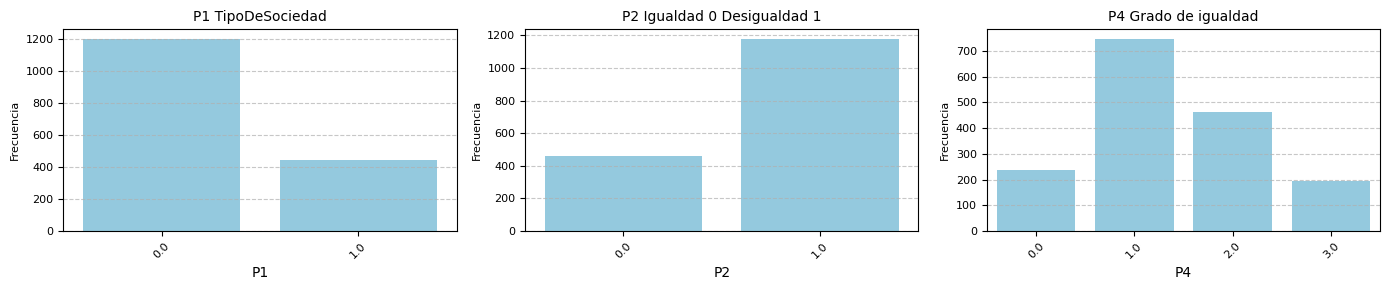

In [27]:
var_name = ['TipoDeSociedad','Igualdad 0 Desigualdad 1','Grado de igualdad']
graficarPvariables(df,df.columns[:3],ncols=3,nrows=1,figsize=(14,3),var_name=var_name)

In [28]:

printearTablaContigencia(df,col1='P1',col2='P2')


Tabla de contigencias
P2         0.0        1.0
P1                       
0.0  21.585366  51.463415
1.0   6.585366  20.365854


Ho: Las variables son independientes
H1: las variables no son independientes
Valor p: 1.0

No hay una relación significativa entre P1 y P2. No rechazo la independencia


### P.3 A continuación voy a leerle algunos movimientos u organizaciones sociales y quisiera que me dijera qué grado de simpatía tiene hacia cada uno de ellos. Utilice, por favor, la escala de 0 a 10, sabiendo que 0 significa 'ninguna simpatía' y el 10 'mucha simpatía'.  
(ENTREVISTADOR/A: LEER CADA UNA DE LAS ORGANIZACIONES)  

**[P3]**  
| Movimiento/Organización         | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|----------------------------------|---|---|---|---|---|---|---|---|---|---|----|
| Ecologistas                      | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| Pacifistas                       | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| Feministas                       | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| Pro-derechos humanos             | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| Organizaciones LGTBIQ+           | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |


Grado de simpatía


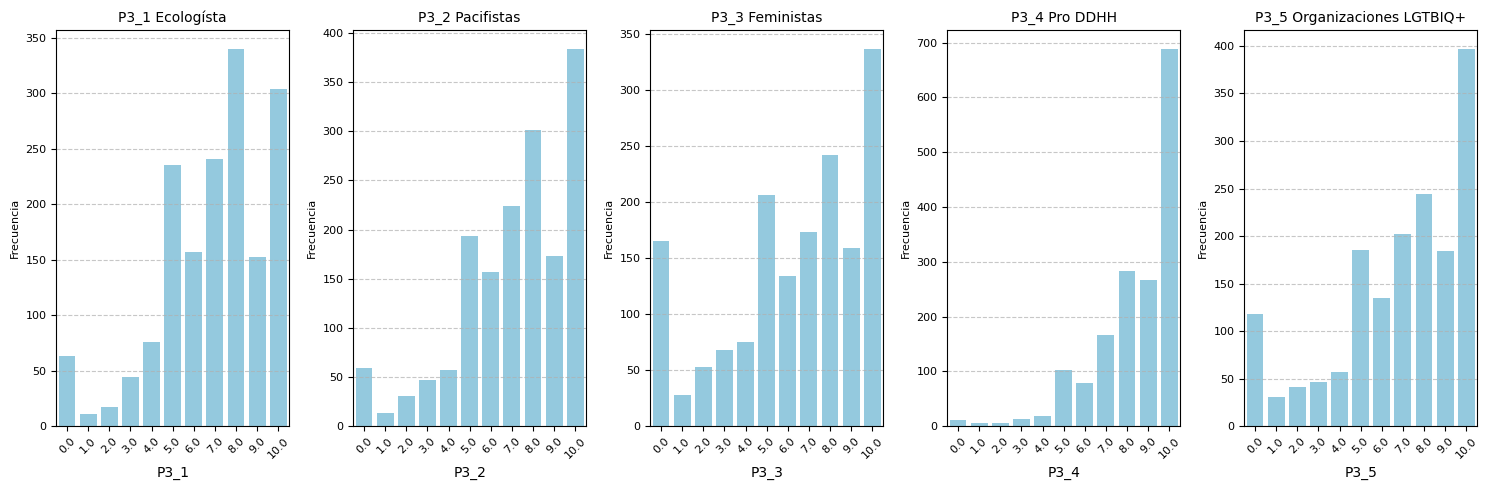

In [29]:
var_name=['Ecologísta','Pacifistas','Feministas','Pro DDHH','Organizaciones LGTBIQ+']
print("Grado de simpatía")
graficarPvariables(df,df.columns[3:8],ncols=5,nrows=1,var_name=var_name)

El **gráfico de correlación de Spearman** es adecuado para analizar la relación entre variables ordinales porque no asume una distribución lineal ni una relación de proporcionalidad entre los valores, a diferencia de la correlación de Pearson. Dado que las variables ordinales reflejan un orden pero no necesariamente una distancia constante entre los valores, Spearman mide la fuerza y dirección de la relación basándose en los rangos de los datos en lugar de sus valores absolutos.

En tu caso, con una variable ordinal de 10 valores del 0 al 9, el **coeficiente de correlación de Spearman** permite evaluar la asociación entre las variables sin asumir una relación lineal estricta, siendo útil para identificar tendencias monotónicas (es decir, si al aumentar una variable, la otra tiende a aumentar o disminuir, aunque no de forma constante). Esto lo hace especialmente útil cuando las variables no cumplen con las suposiciones requeridas para la correlación de Pearson, como la normalidad de los datos.

Por lo tanto, usar el gráfico de correlación de Spearman ayudará a identificar patrones de asociación entre variables ordinales de manera robusta, respetando la naturaleza de los datos.

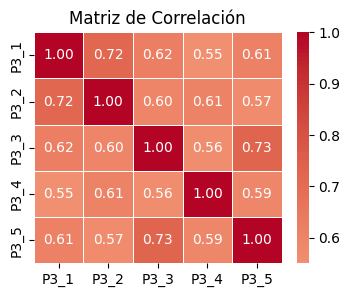

In [30]:
graficarPcorrelaciones(df,columns_name=df.columns[3:8],method='spearman')

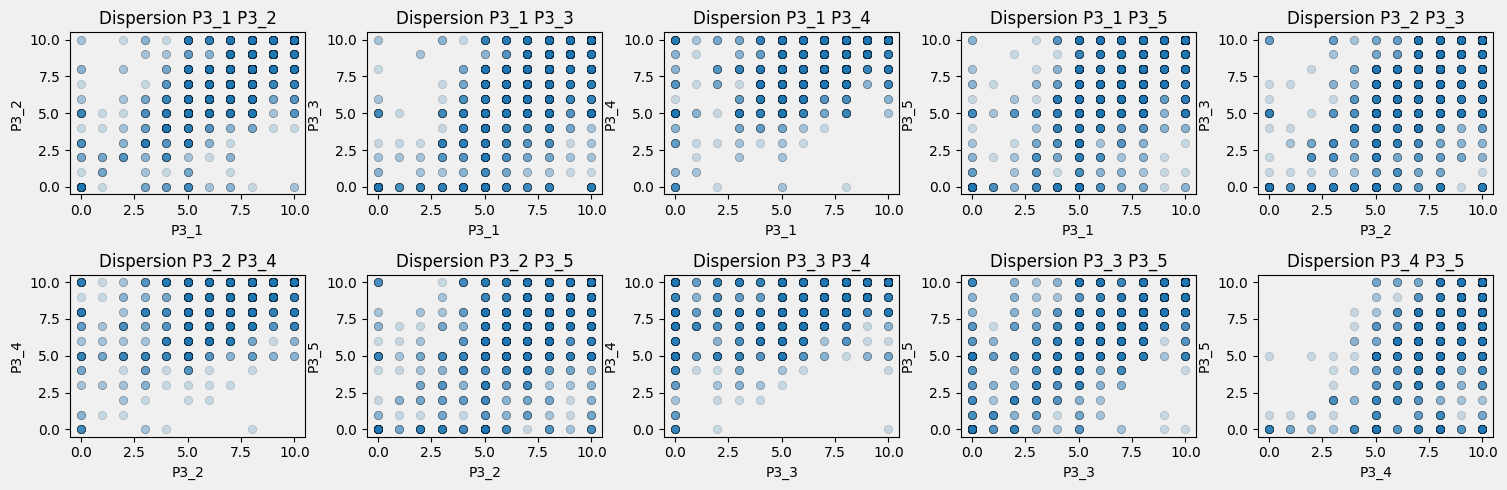

In [31]:
from itertools import combinations
palette = sns.color_palette("viridis", as_cmap=True)

fig,axes = plt.subplots(ncols=5,nrows=2,figsize=(15,5))
axes = axes.ravel()
for (col1,col2),ax in zip(combinations(df.columns[3:8],2),axes):
  sns.scatterplot(df,x=col1,y=col2,ax=ax,alpha=0.2, edgecolor="black")
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.set_title(f'Dispersion {col1} {col2}')
  ax.set_facecolor('#f0f0f0')  # Fondo gris claro para el área del gráfico
# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
fig.patch.set_facecolor('#f0f0f0')  # Fondo gris claro
plt.show()

### P.5 Y en comparación con la situación de hace diez años, ¿cree Ud. que las desigualdades entre hombres y mujeres son hoy mayores, iguales o menores?  

| Respuesta            | Mayores (0) | Iguales (1) | Menores (2) |
|----------------------|-------------|-------------|-------------|
| Desigualdades        | 0           | 1           | 2           |

### P.6 Ahora voy a leerle distintas opiniones sobre esta cuestión. Dígame si está muy de acuerdo, bastante, poco o nada de acuerdo con cada una de ellas.

| Opinión                                                                 | Muy de acuerdo (0) | Bastante de acuerdo (1) | Regular (2) | Poco de acuerdo (3) | Nada de acuerdo (4) |
|-------------------------------------------------------------------------|---------------------|-------------------------|-------------|----------------------|---------------------|
| Las mujeres no lograrán la igualdad a menos que los hombres también luchen por los derechos de las mujeres | 0                   | 1                       | 2           | 3                    | 4                   |
| Se ha llegado tan lejos en la promoción de la igualdad de las mujeres que ahora se está discriminando a los hombres | 0                   | 1                       | 2           | 3                    | 4                   |
| La igualdad entre hombres y mujeres contribuye a hacer una sociedad más justa | 0                   | 1                       | 2           | 3                    | 4                   |


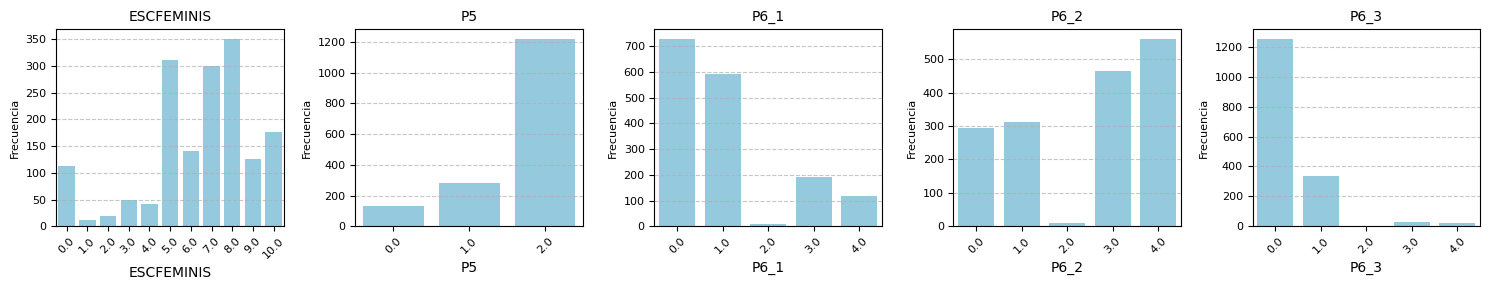

In [32]:
graficarPvariables(df,columns_name=df.columns[8:13],ncols=5,nrows=1,figsize=(15,3))

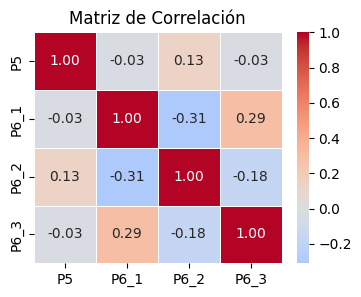

In [33]:
graficarPcorrelaciones(df,df.columns[9:13],method='spearman')

### P.7 ¿Y cree Ud. que actualmente la situación de las mujeres en España es mejor, igual o peor que la de los hombres en los siguientes aspectos?
(ENTREVISTADOR/A: LEER CADA UNO DE LOS ASPECTOS)  

| Aspecto                                                       | Mejor (0) | Igual (1) | Peor (2) |
|---------------------------------------------------------------|-----------|-----------|----------|
| Los salarios                                                  | 0         | 1         | 2        |
| Las posibilidades de ascenso en el trabajo                    | 0         | 1         | 2        |
| Las oportunidades para encontrar empleo                       | 0         | 1         | 2        |
| El acceso a puestos de responsabilidad en las empresas        | 0         | 1         | 2        |
| Las posibilidades de compaginar la vida laboral y familiar    | 0         | 1         | 2        |
| El acceso a puestos de responsabilidad en la vida política    | 0         | 1         | 2        |
| El acceso a la educación                                      | 0         | 1         | 2        |


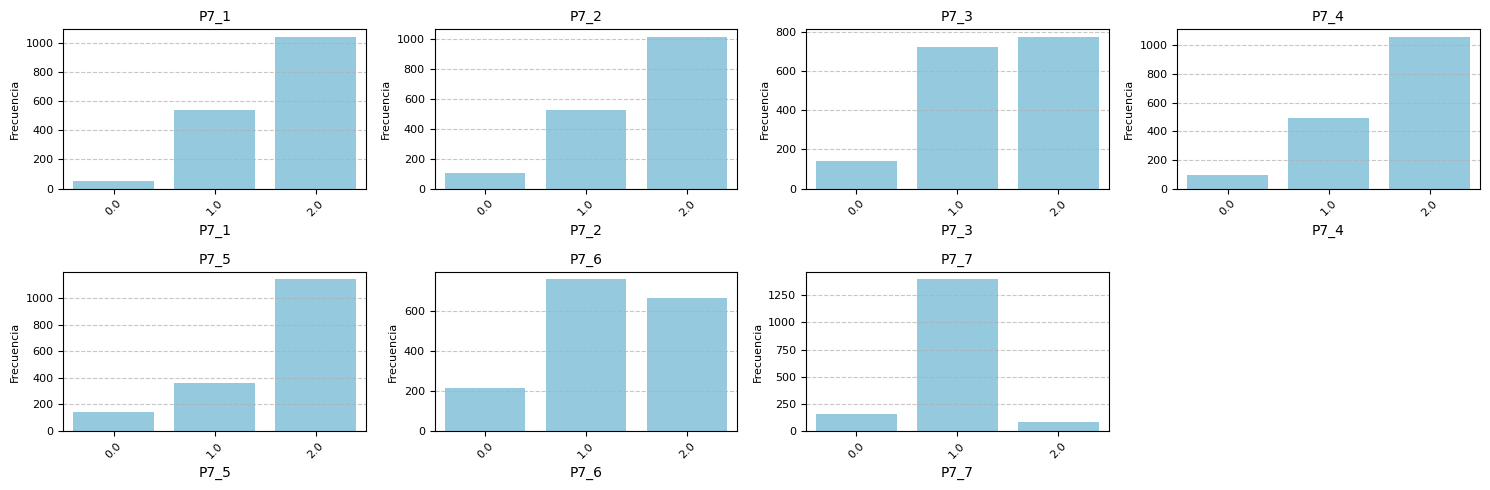

In [34]:
graficarPvariables(df,df.columns[13:20],ncols=4,nrows=2)

In [35]:
from itertools import combinations
def contrastarIndependenciaPvariables(df,column_name):
    p_values = []
    for col1,col2 in combinations(column_name,2):
        p_values.append(contrastarIndependencia(df,col1,col2,imprimir=False))
    p_values = np.array(p_values)

    print("si es menor a 0.05 rechazo la independencia.¿Rechazo?")
    print(p_values<0.05)

In [36]:
contrastarIndependenciaPvariables(df,column_name=df.columns[13:20])

si es menor a 0.05 rechazo la independencia.¿Rechazo?
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


### P.8 Ahora voy a leerle unas frases sobre la situación de las mujeres en el mundo laboral y quisiera que me dijera si está más bien de
acuerdo o más bien en desacuerdo con cada una de ellas. (ENTREVISTADOR/A: LEER CADA UNA DE LAS FRASES)  

**[P8]**

| Frase                                                                                             | Más bien de acuerdo | Ni de acuerdo ni desacuerdo | Más bien en desacuerdo |
|---------------------------------------------------------------------------------------------------|----------------------|----------------------------|------------------------|
| Las mujeres tienen que esforzarse más que los hombres para demostrar que pueden desempeñar el mismo puesto de trabajo. | 1                    | 2                          | 3                      |
| La igualdad de las mujeres en el mundo laboral depende más de ellas que de cualquier ley.          | 1                    | 2                          | 3                      |
| Compaginar vida familiar y laboral es un asunto privado de organización doméstica entre hombres y mujeres y de poco sirve que intervengan las instituciones. | 1                    | 2                          | 3                      |
| Cuando un porcentaje elevado de mujeres comienza a acceder a una profesión, esta tiende a perder prestigio social. | 1                    | 2                          | 3                      |


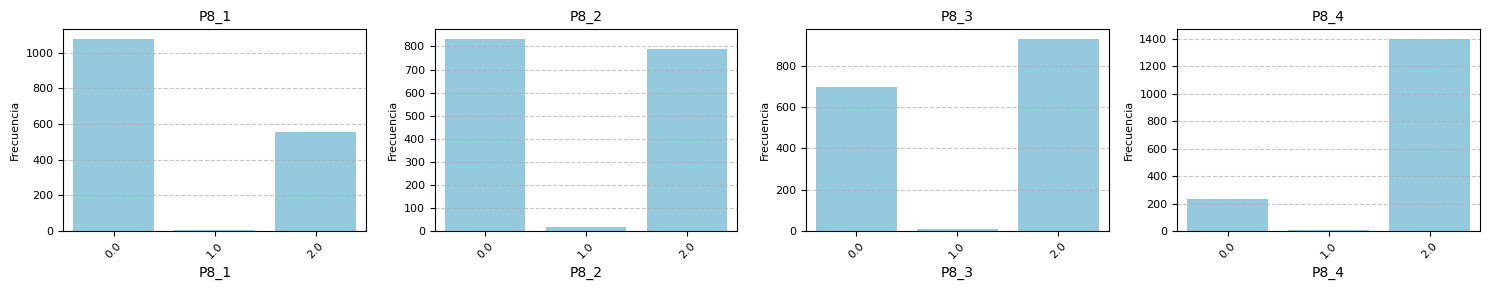

In [37]:
graficarPvariables(df,df.columns[20:24],ncols=4,nrows=1,figsize=(15,3))

In [38]:
contrastarIndependenciaPvariables(df,df.columns[20:24])

si es menor a 0.05 rechazo la independencia.¿Rechazo?
[ True  True  True  True  True  True]


### **P.9** En general, ¿con qué frecuencia, a menudo, algunas veces, raramente o nunca, habla o discute de asuntos relacionados con la igualdad entre hombres y mujeres con su...? (ENTREVISTADOR/A: LEER)

| Persona                    | A menudo | Algunas veces | Raramente | Nunca |
|----------------------------|----------|---------------|-----------|-------|
| Familia (padre, madre, cónyuge, pareja, hijos/as, etc.) | 1        | 2             | 3         | 4     |
| Amigos y amigas            | 1        | 2             | 3         | 4     |
| Compañero/as de estudio o trabajo | 1        | 2             | 3         | 4     |


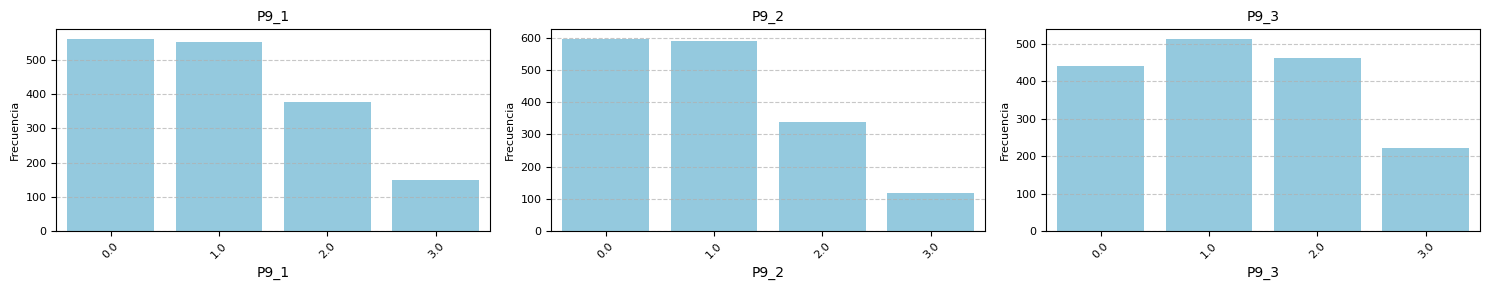

In [39]:
graficarPvariables(df,df.columns[24:27],ncols=3,nrows=1,figsize=(15,3))

In [40]:
contrastarIndependenciaPvariables(df,df.columns[24:27])

si es menor a 0.05 rechazo la independencia.¿Rechazo?
[ True  True  True]


### **P.10** Ahora dígame si aprueba o desaprueba las siguientes conductas posibles. (ENTREVISTADOR/A: LEER CADA UNA DE LAS CONDUCTAS Y MARQUE LO QUE CORRESPONDA)

| Conducta                                               | Aprueba | Desaprueba |
|--------------------------------------------------------|---------|------------|
| Que un hombre se acoja al permiso de paternidad de 16 semanas para cuidar a su hijo o hija. | 1       | 2          |
| Que un hombre asuma una parte igualitaria de las tareas del hogar. | 1       | 2          |
| Que un hombre recrimine a sus amigos por tener comportamientos machistas. | 1       | 2          |
| Que un hombre se defina como feminista.                | 1       | 2          |


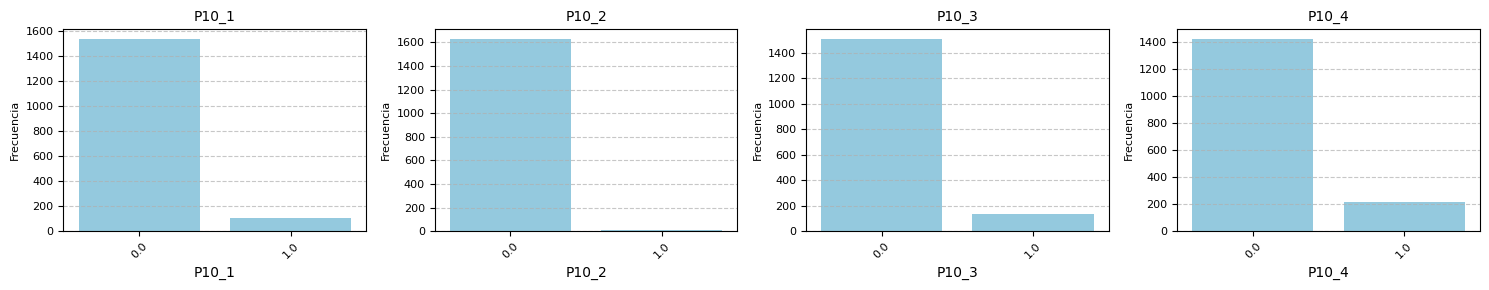

In [41]:
graficarPvariables(df,df.columns[27:31],ncols=4,nrows=1,figsize=(15,3))

In [42]:
contrastarIndependenciaPvariables(df,df.columns[27:31])

si es menor a 0.05 rechazo la independencia.¿Rechazo?
[ True  True  True  True  True  True]


### **P.11** Y en qué medida está de acuerdo con cada una de las siguientes afirmaciones, muy de acuerdo, bastante, poco o nada de acuerdo. (ENTREVISTADOR/A: LEER CADA UNA DE LAS OPINIONES)

| Afirmación                                             | Muy de acuerdo | Bastante de acuerdo | Poco de acuerdo | Nada de acuerdo |
|--------------------------------------------------------|----------------|----------------------|------------------|-----------------|
| La maternidad es la mayor satisfacción que una mujer puede tener | 1              | 2                    | 3                | 4               |
| Se critica más a una mujer con una vida sexual activa que a un hombre | 1              | 2                    | 3                | 4               |
| La crítica a los chistes machistas es exagerada        | 1              | 2                    | 3                | 4               |
| La mayor parte de la pornografía es machista           | 1              | 2                    | 3                | 4               |
| Siempre es agradable recibir un piropo                 | 1              | 2                    | 3                | 4               |





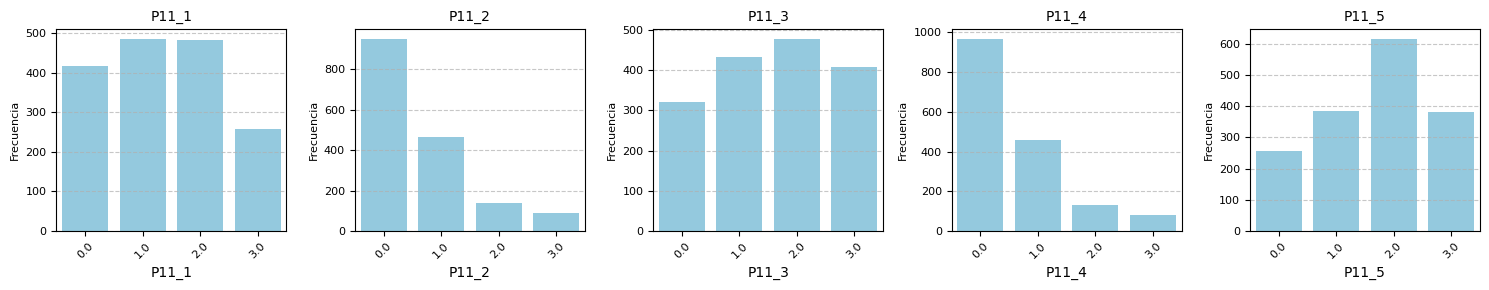

In [43]:
graficarPvariables(df,df.columns[31:36],ncols=5,nrows=1,figsize=(15,3))

In [44]:
contrastarIndependenciaPvariables(df,df.columns[31:36])

si es menor a 0.05 rechazo la independencia.¿Rechazo?
[ True  True  True  True  True  True  True  True  True  True]


In [45]:
df.columns

Index(['P1', 'P2', 'P4', 'P3_1', 'P3_2', 'P3_3', 'P3_4', 'P3_5', 'ESCFEMINIS',
       'P5', 'P6_1', 'P6_2', 'P6_3', 'P7_1', 'P7_2', 'P7_3', 'P7_4', 'P7_5',
       'P7_6', 'P7_7', 'P8_1', 'P8_2', 'P8_3', 'P8_4', 'P9_1', 'P9_2', 'P9_3',
       'P10_1', 'P10_2', 'P10_3', 'P10_4', 'P11_1', 'P11_2', 'P11_3', 'P11_4',
       'P11_5', 'P14_1', 'P14_2', 'P14_3', 'P14_4', 'P14_5', 'P14_6', 'P17'],
      dtype='object')

### **P.14** En los últimos 12 meses, ¿ha presenciado o realizado alguna de las siguientes acciones? (ENTREVISTADOR/A: LEER CADA UNA DE LAS ACCIONES Y MARQUE LO QUE CORRESPONDA)

| Acción                                                            | SÍ | No |
|------------------------------------------------------------------|----|----|
| Presenció algún caso de discriminación sexual en el trabajo      | 1  | 2  |
| Escuchó comentarios sexistas por parte de amigo/as o familiares  | 1  | 2  |
| Firmó una petición (online o en papel) a favor de la igualdad de género | 1  | 2  |
| Presenció como un hombre acosaba sexualmente a una mujer        | 1  | 2  |
| Se enfrentó a alguien que estaba acosando sexualmente a una mujer | 1  | 2  |
| Participó en una manifestación o protesta a favor de los derechos de las mujeres | 1  | 2  |


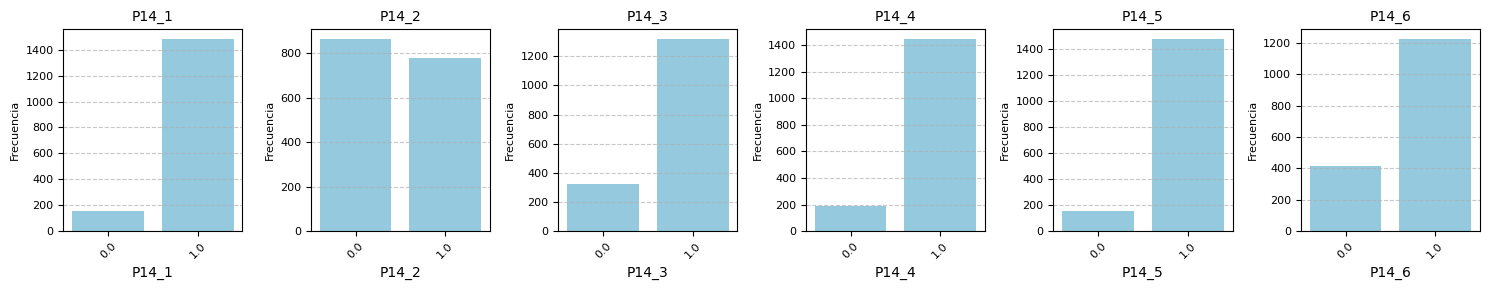

In [46]:
graficarPvariables(df,df.columns[36:42],ncols=6,nrows=1,figsize=(15,3))

In [47]:
contrastarIndependenciaPvariables(df,df.columns[36:42])

si es menor a 0.05 rechazo la independencia.¿Rechazo?
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


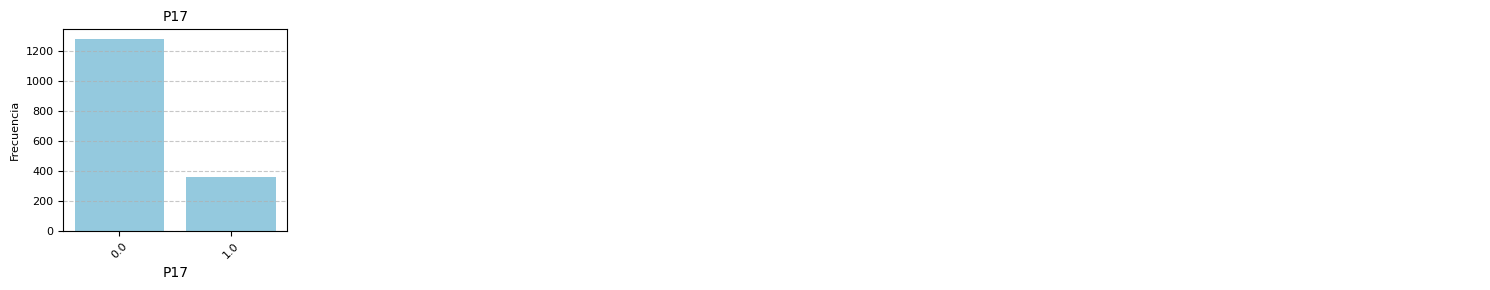

In [48]:
graficarPvariables(df,[df.columns[-1]],ncols=6,nrows=1,figsize=(15,3))